## Download and prepare the dataset

Set up the posits as default

In [1]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

2023-06-21 15:19:58.156993: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-06-21 15:19:58.157083: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-06-21 15:19:58.157108: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-06-21 15:19:58.157112: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


'posit160'

In [2]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:4000].reshape((4000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images[:400].reshape((400, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:4000])
test_labels = to_categorical(test_labels[:400])

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [3]:
train_images.shape

(4000, 28, 28, 1)

## Download and prepare the dataset

In [4]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))


model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2023-06-21 15:20:01.033323: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's display the architecture of our convnet so far:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [6]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=6)

model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.1,callbacks=[earlystop_callback])

2023-06-21 15:20:01.547054: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
29/29 [==============================] - 1s 43ms/step - loss: 2.2666 - accuracy: 0.1003 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 2/50
29/29 [==============================] - 1s 37ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 3/50
29/29 [==============================] - 1s 38ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 4/50
29/29 [==============================] - 1s 35ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 5/50
29/29 [==============================] - 1s 38ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 6/50
29/29 [==============================] - 1s 36ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 7/50
29/29 [==============================] - 1s 36ms/step - loss: 2.2666 - accuracy: 0.1122 - val_loss: 2.2949 - val_accuracy: 0.1000


**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

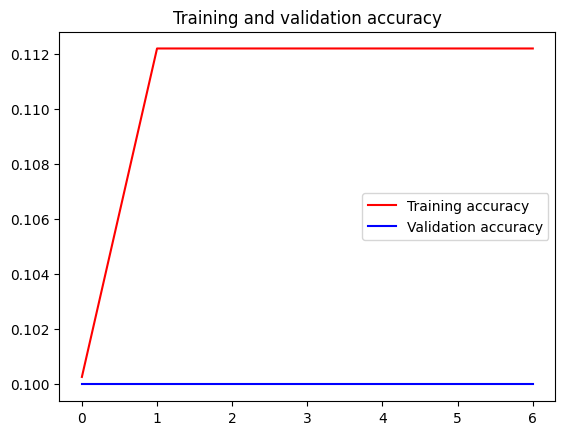

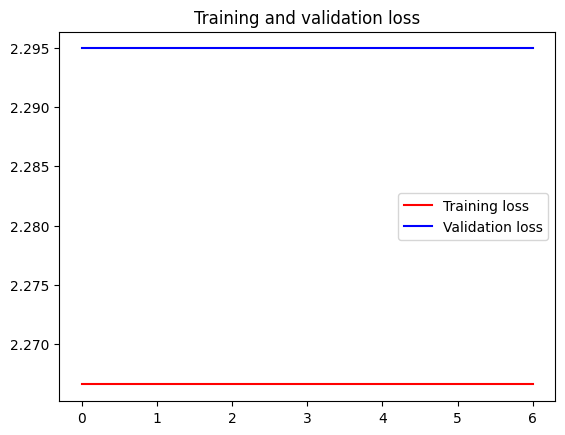

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

 1/13 [=>............................] - ETA: 0s - loss: 2.2910 - accuracy: 0.1562

13/13 [==============================] - 0s 9ms/step - loss: 2.2822 - accuracy: 0.1425


In [10]:
test_acc

0.142456

In [11]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.0967407, 0.107056, 0.0995789, 0.100708, 0.104004, 0.093689,
        0.100494, 0.104034, 0.094696, 0.0993042]], dtype=posit160)

In [12]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]
first_layer_weights

array([[-0.0804138, -0.0808105, -0.0809021, ..., -0.0810242, -0.0809021,
        -0.0805054],
       [-0.0801697, -0.079895, -0.079895, ..., -0.0800781, -0.0803528,
        -0.0800781],
       [-0.0804749, -0.0804138, -0.0810242, ..., -0.0804443, -0.0803528,
        -0.080719],
       ...,
       [-0.0810242, -0.0808411, -0.0800476, ..., -0.0802612, -0.0801086,
        -0.0809326],
       [-0.0809021, -0.0802612, -0.0801392, ..., -0.0809326, -0.0803833,
        -0.0809021],
       [-0.0804138, -0.0798645, -0.0809937, ..., -0.0801697, -0.0802917,
        -0.0805664]], dtype=posit160)